In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df=df.drop(columns=["CustomerID","Genre","Age"],axis=1)

In [5]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


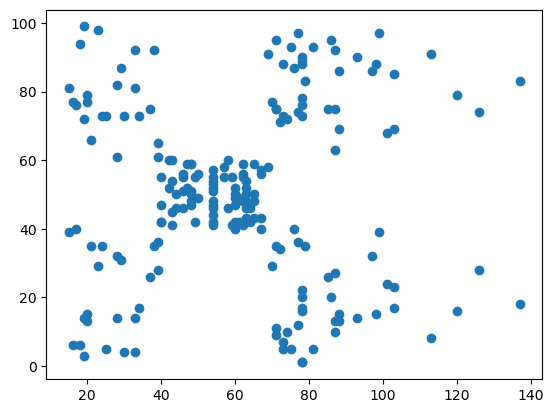

In [6]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss = []

for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

/Users/anshverma/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anshverma/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anshverma/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anshverma/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

In [9]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30552.71402546729,
 25018.576334776335,
 21838.863692828912,
 19826.260354715967,
 17508.970577400072,
 16438.703531161285,
 14694.613151096215,
 12947.992123402913,
 11754.10654647285,
 11016.667308553515,
 10231.013774443945,
 9251.1317372951,
 8800.25726706244,
 8112.115317837514]

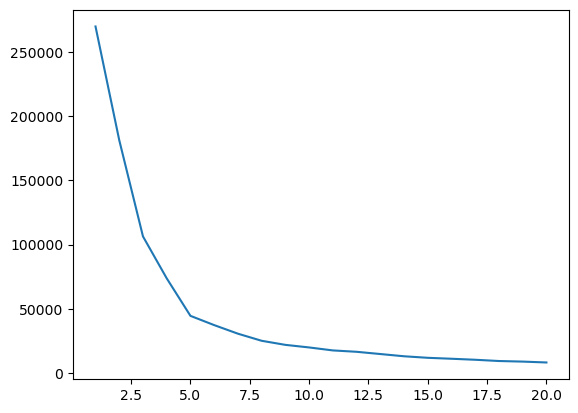

In [10]:
plt.plot(range(1,21),wcss)

In [11]:
X=df.iloc[:,:].values
km=KMeans(n_clusters=5)
y_means=km.fit_predict(X)

/Users/anshverma/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
y_means

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [13]:
X[y_means == 3,0]

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137])

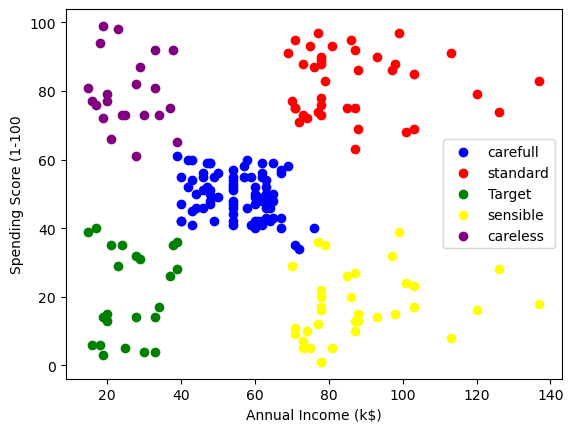

In [14]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue',label='carefull')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red',label='standard')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green',label='Target')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow',label='sensible')
plt.scatter(X[y_means == 4,0],X[y_means == 4,1],color='purple',label='careless')
plt.legend()
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100")
plt.show()

In [15]:
df["Target"]=y_means

In [16]:
df

,Annual Income (k$),Spending Score (1-100),Target
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3
